# Experiments for the Eikonal equation in a d-dimensional cube

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_cube import plot_2d_proj
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD
from PointSampling.Cube import data_gen_cube
from NeuralNetworks.NNs import FCFF_3L, FCFF_4L

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

n_experiments_rep = 10

In [2]:
# Dimension of the d-dimensional cube for each experiment
dim_list = 3*[5] + 3*[8]
# Architecture in each experiment
arch_list = [[30,30], 
             [30,30,30],
             [30,30,30],
             [40,40], 
             [40,40,40], 
             [40,40,40]]

n_experiments = len(dim_list)
side_length = 6.


# Parameters for each experiment
delta_list = [[.7, .3, .1, .05]]*n_experiments
alpha_list = [[2.5, 2., 1., .5]]*n_experiments
rounds = len(delta_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[80]*rounds]*n_experiments

num_iterations_list = [[2000, 2000, 2000, 2000],
                       [2000, 2000, 2000, 2000],
                       [2000, 2500, 3000, 5000],
                       [3000, 3000, 3000, 3000],
                       [3000, 3000, 3000, 3000],
                       [3000, 4000, 5000, 7000]]    

100%|██████████| 2000/2000 [00:16<00:00, 124.19it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


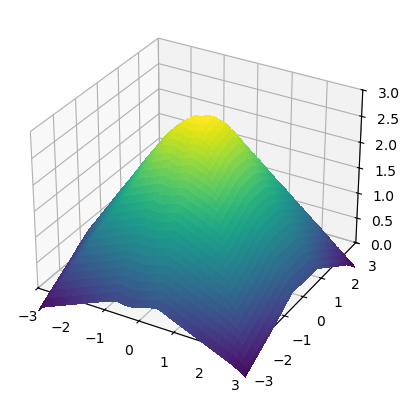

100%|██████████| 2000/2000 [00:16<00:00, 121.03it/s]


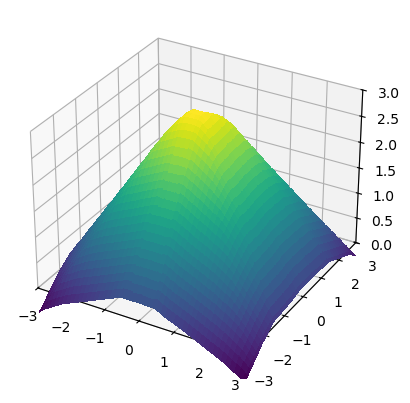

100%|██████████| 2000/2000 [00:15<00:00, 127.02it/s]


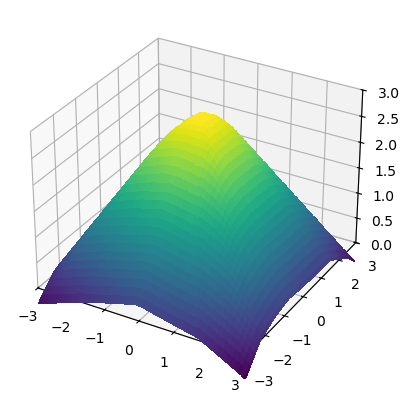

100%|██████████| 2000/2000 [00:15<00:00, 125.39it/s]


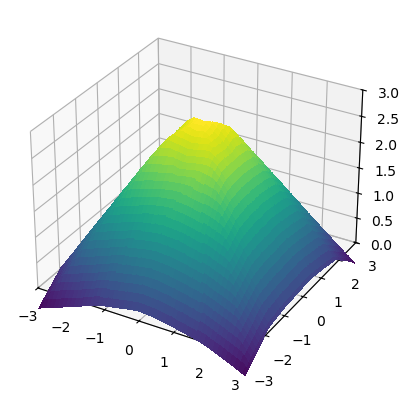

100%|██████████| 2000/2000 [00:16<00:00, 123.61it/s]


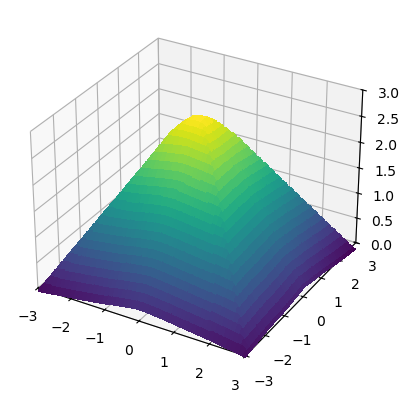

100%|██████████| 2000/2000 [00:14<00:00, 138.39it/s]


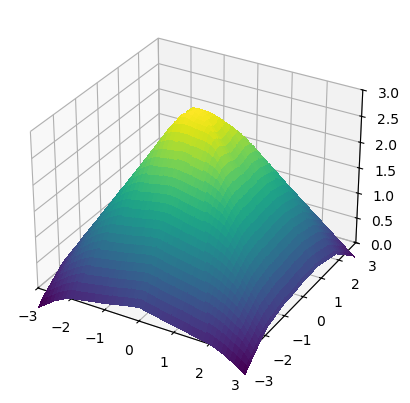

100%|██████████| 2000/2000 [00:16<00:00, 119.08it/s]


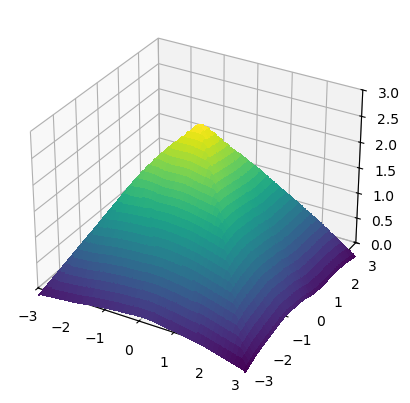

100%|██████████| 2000/2000 [00:13<00:00, 146.26it/s]


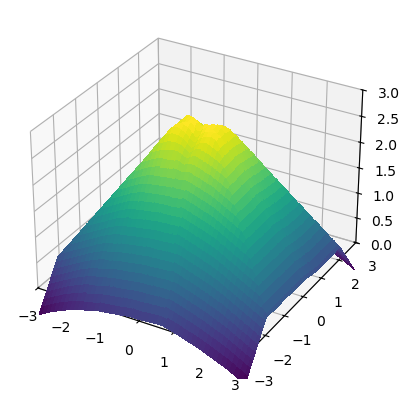

100%|██████████| 2000/2000 [00:11<00:00, 170.93it/s]


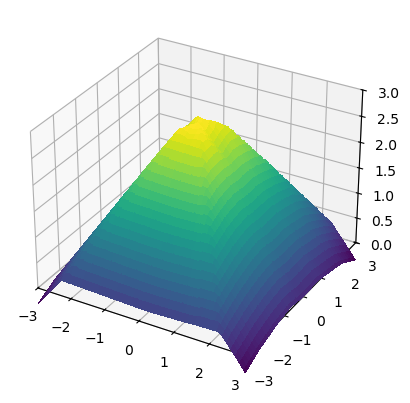

100%|██████████| 2000/2000 [00:16<00:00, 122.14it/s]


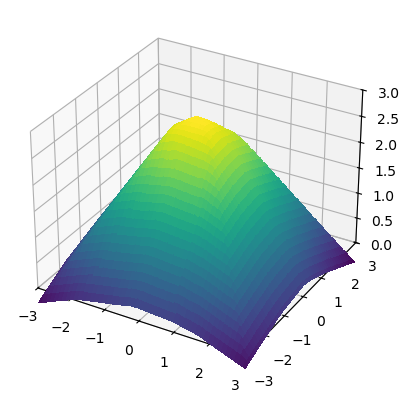

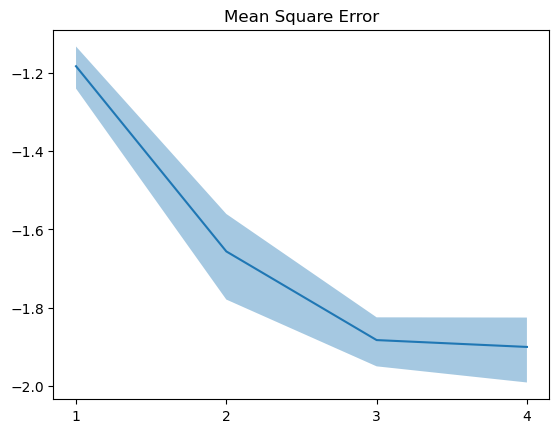

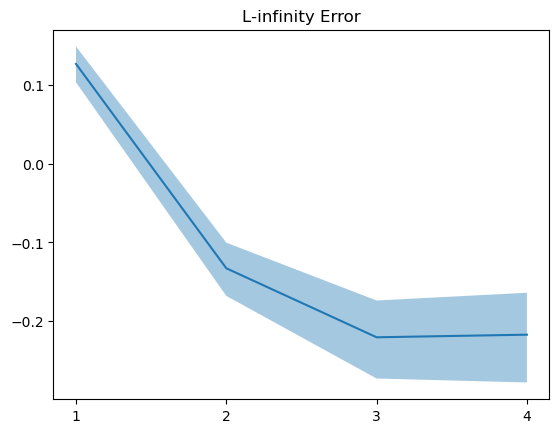

100%|██████████| 2000/2000 [00:22<00:00, 89.05it/s] 


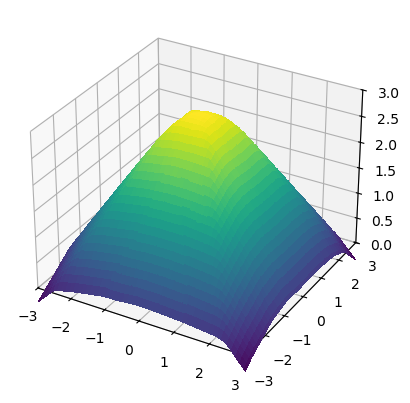

100%|██████████| 2000/2000 [00:22<00:00, 90.30it/s] 


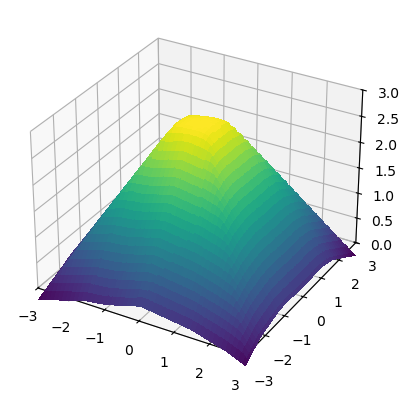

100%|██████████| 2000/2000 [00:22<00:00, 87.28it/s]


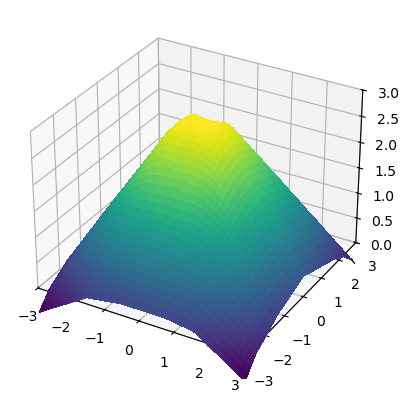

100%|██████████| 2000/2000 [00:20<00:00, 96.81it/s] 


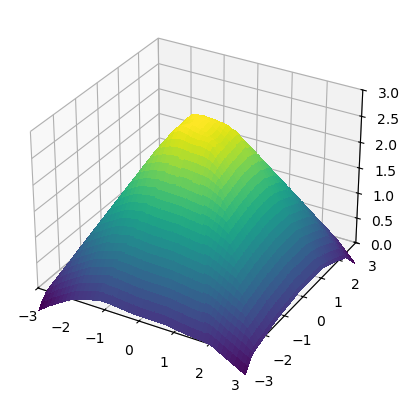

100%|██████████| 2000/2000 [00:21<00:00, 92.14it/s] 


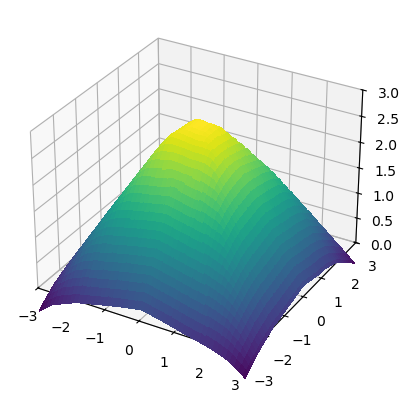

100%|██████████| 2000/2000 [00:22<00:00, 90.85it/s]


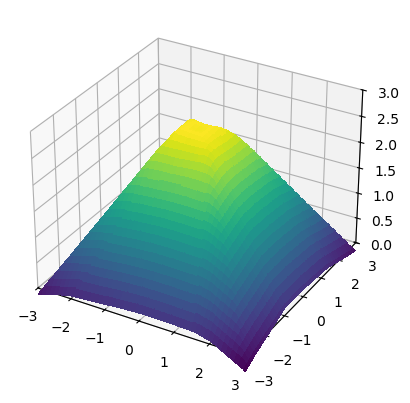

100%|██████████| 2000/2000 [00:22<00:00, 88.95it/s] 


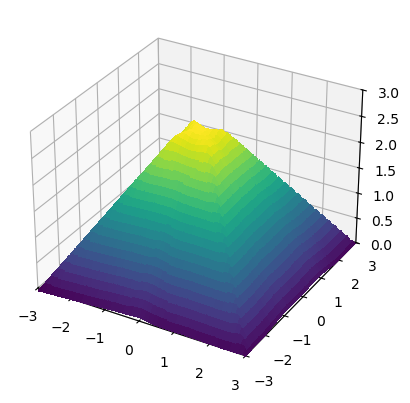

100%|██████████| 2000/2000 [00:20<00:00, 99.28it/s] 


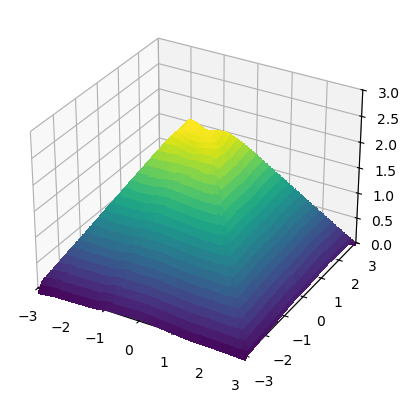

100%|██████████| 2000/2000 [00:21<00:00, 94.45it/s] 


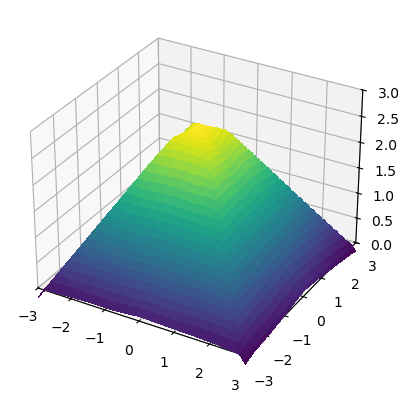

100%|██████████| 2000/2000 [00:21<00:00, 91.97it/s] 


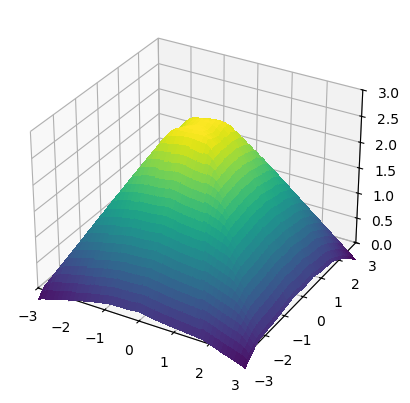

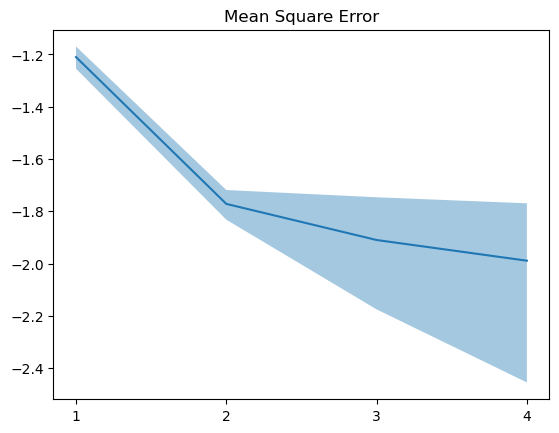

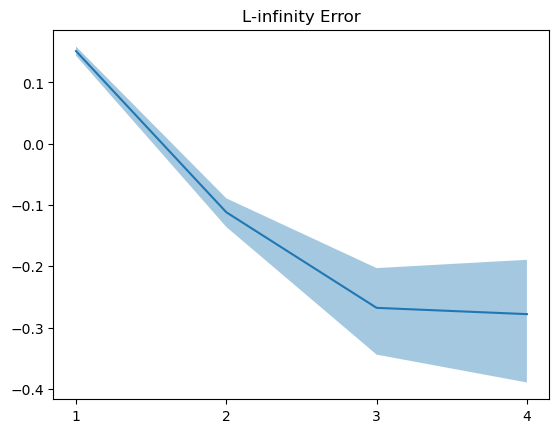

100%|██████████| 5000/5000 [00:54<00:00, 91.53it/s] 


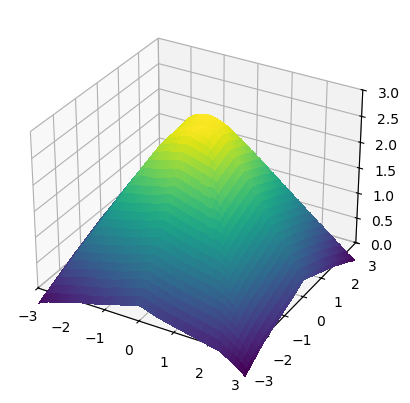

100%|██████████| 5000/5000 [00:52<00:00, 95.81it/s] 


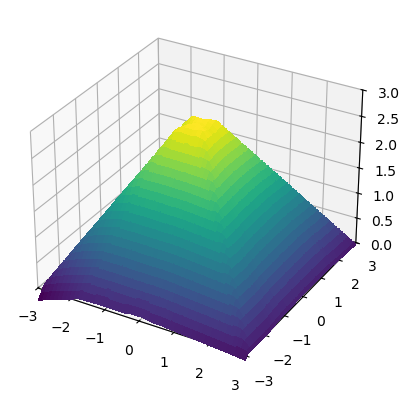

100%|██████████| 5000/5000 [00:55<00:00, 90.89it/s] 


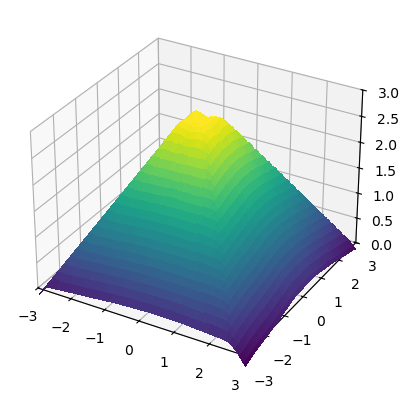

100%|██████████| 5000/5000 [00:49<00:00, 100.13it/s]


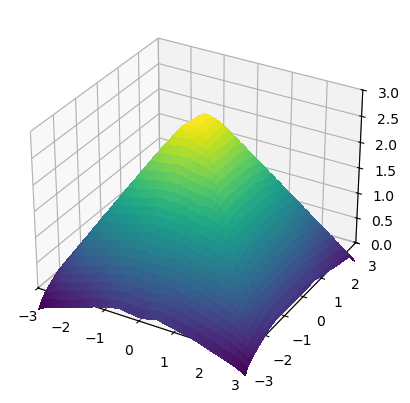

100%|██████████| 5000/5000 [00:54<00:00, 92.06it/s] 


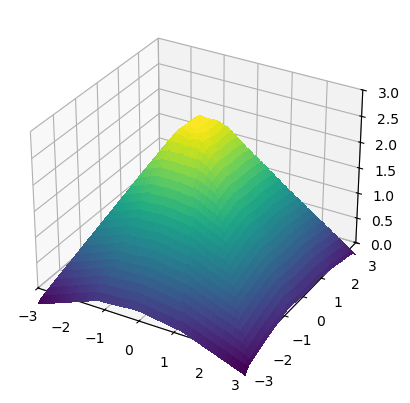

100%|██████████| 5000/5000 [00:54<00:00, 91.93it/s] 


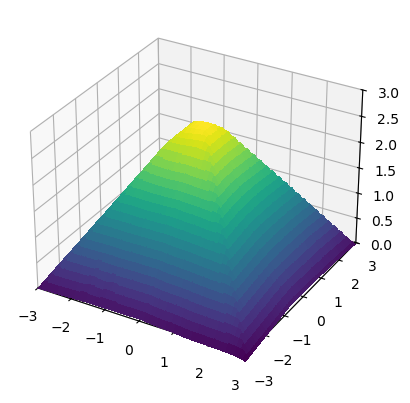

100%|██████████| 5000/5000 [00:51<00:00, 97.75it/s] 


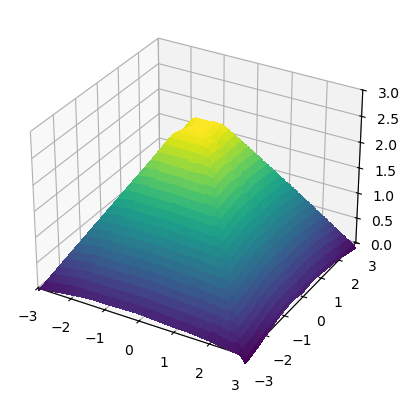

100%|██████████| 5000/5000 [00:54<00:00, 91.65it/s] 


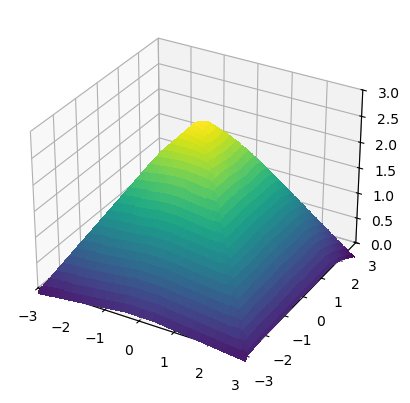

100%|██████████| 5000/5000 [00:54<00:00, 91.07it/s] 


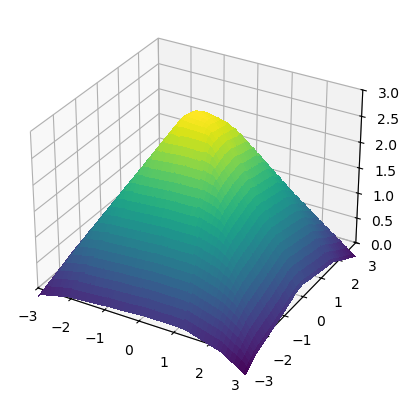

100%|██████████| 5000/5000 [00:51<00:00, 96.51it/s] 


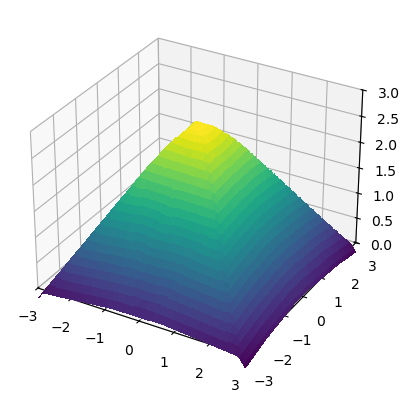

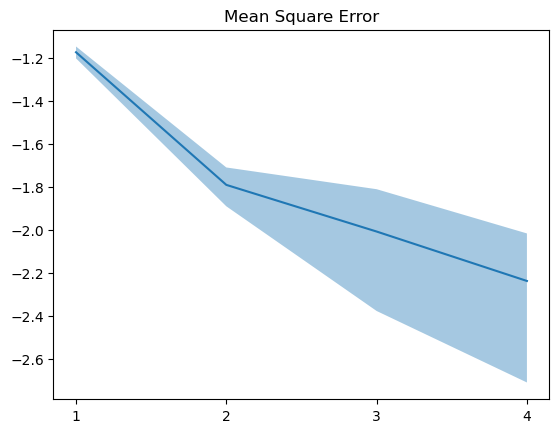

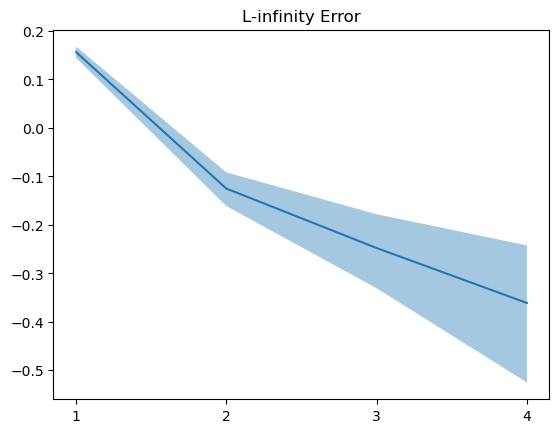

100%|██████████| 3000/3000 [00:36<00:00, 83.22it/s]


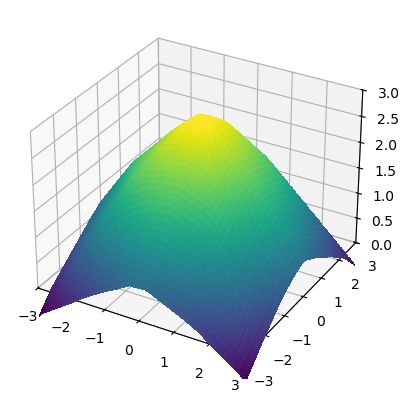

100%|██████████| 3000/3000 [00:37<00:00, 79.55it/s]


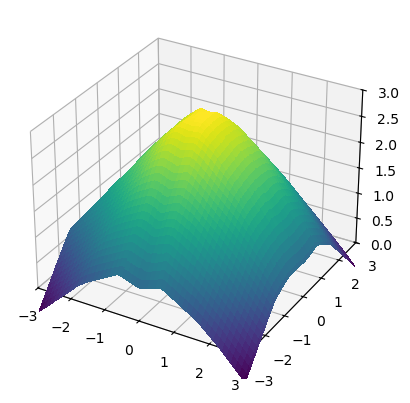

100%|██████████| 3000/3000 [00:39<00:00, 76.26it/s]


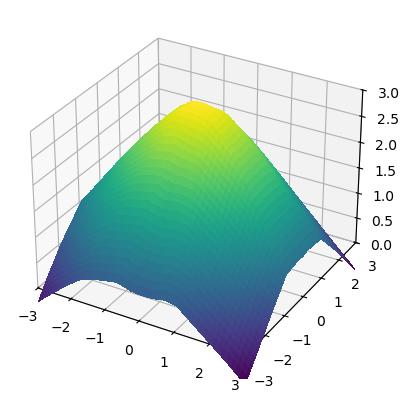

100%|██████████| 3000/3000 [00:35<00:00, 84.83it/s]


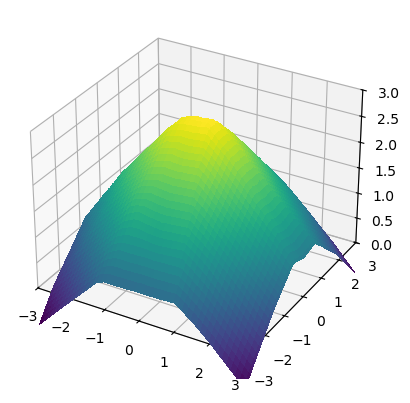

100%|██████████| 3000/3000 [00:44<00:00, 67.70it/s]


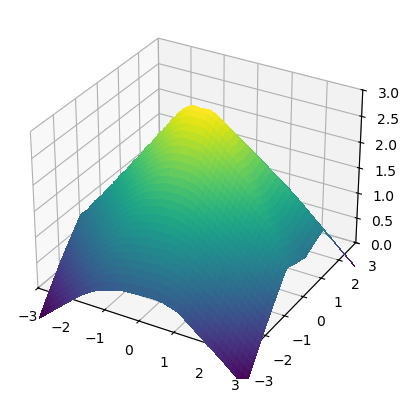

100%|██████████| 3000/3000 [00:35<00:00, 84.66it/s]


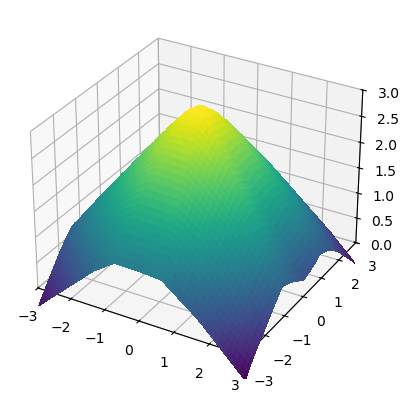

100%|██████████| 3000/3000 [00:40<00:00, 74.08it/s]


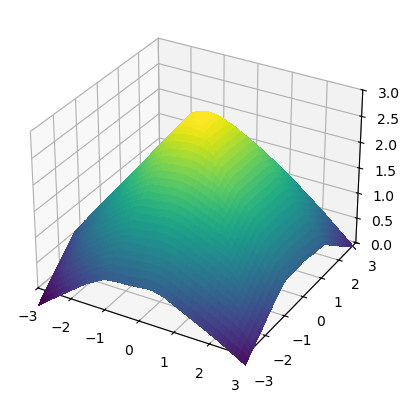

100%|██████████| 3000/3000 [00:36<00:00, 82.89it/s]


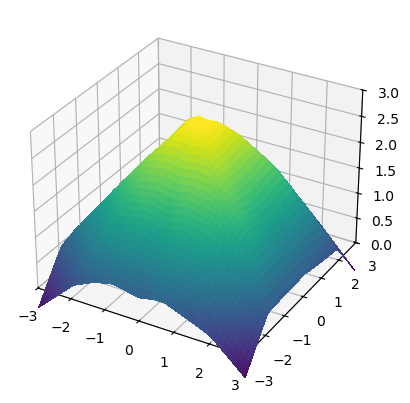

100%|██████████| 3000/3000 [00:37<00:00, 79.27it/s]


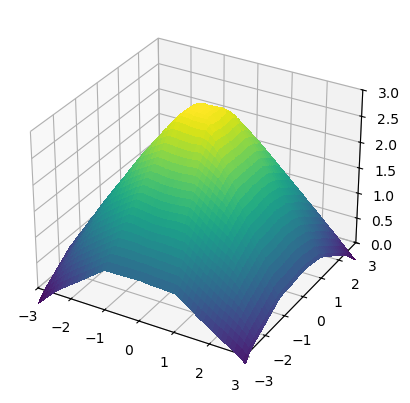

100%|██████████| 3000/3000 [00:39<00:00, 76.63it/s]


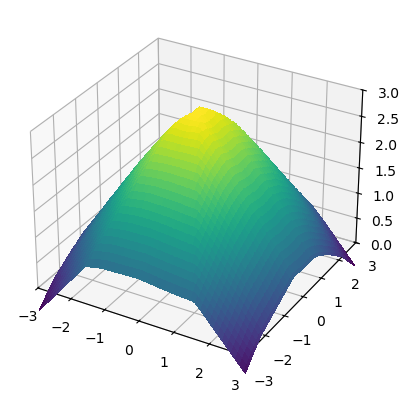

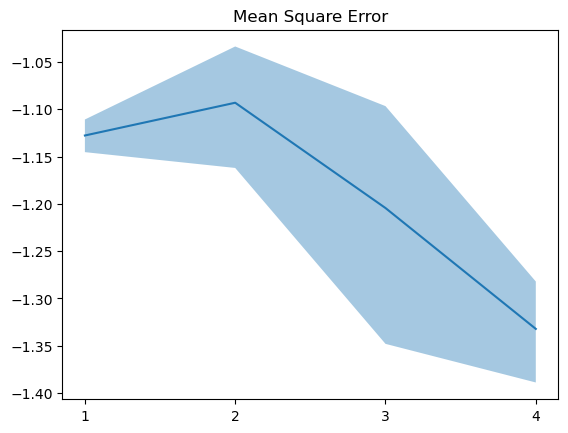

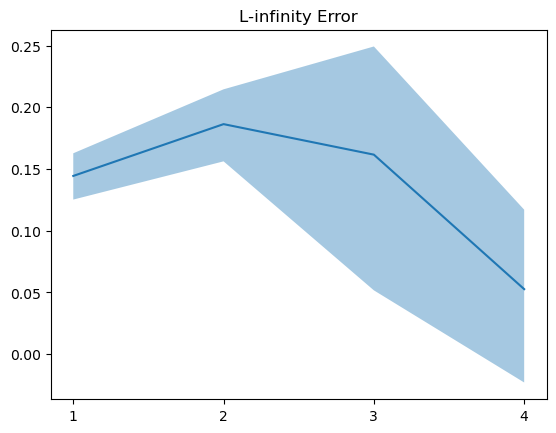

100%|██████████| 3000/3000 [00:51<00:00, 58.69it/s]


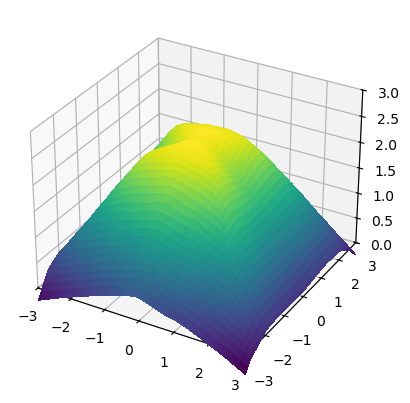

100%|██████████| 3000/3000 [00:50<00:00, 59.43it/s]


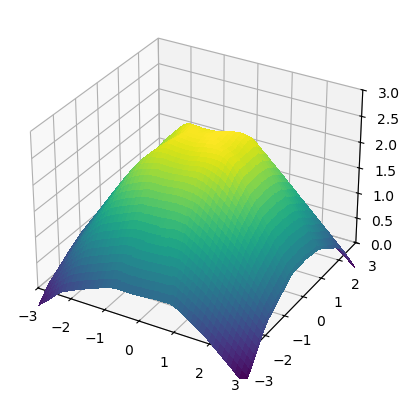

100%|██████████| 3000/3000 [00:55<00:00, 53.61it/s]


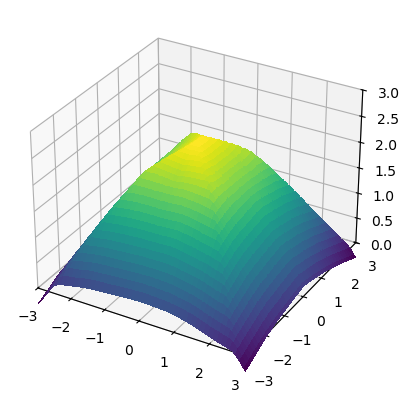

100%|██████████| 3000/3000 [00:49<00:00, 60.16it/s]


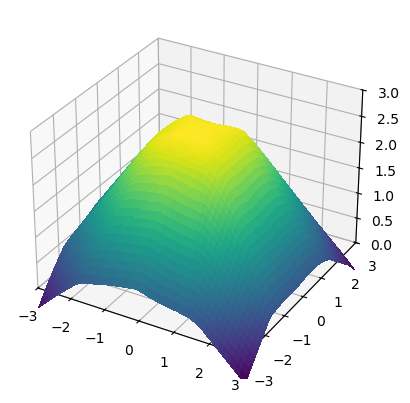

100%|██████████| 3000/3000 [00:56<00:00, 53.57it/s]


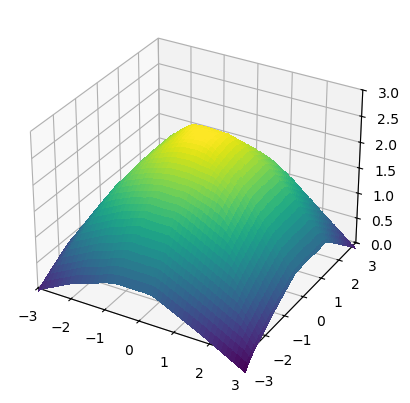

100%|██████████| 3000/3000 [00:49<00:00, 60.71it/s]


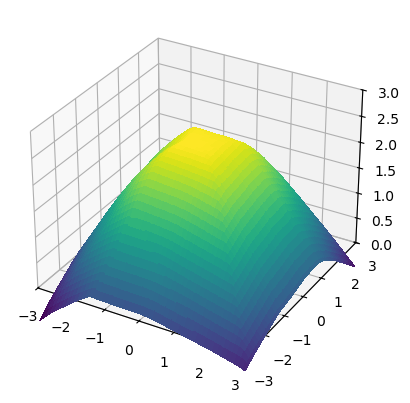

100%|██████████| 3000/3000 [00:51<00:00, 57.82it/s]


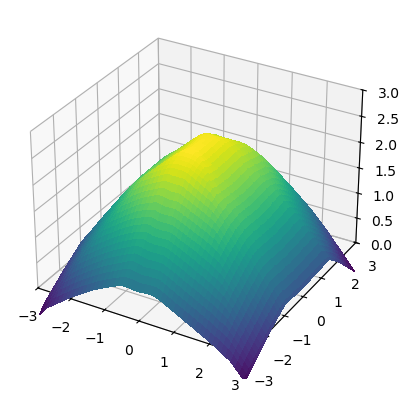

100%|██████████| 3000/3000 [00:52<00:00, 56.67it/s]


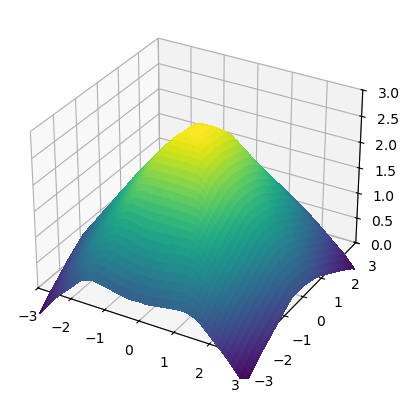

100%|██████████| 3000/3000 [00:49<00:00, 60.59it/s]


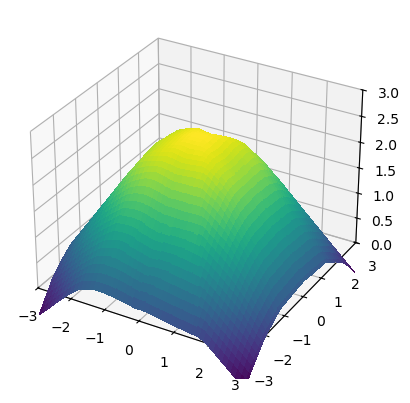

100%|██████████| 3000/3000 [00:58<00:00, 51.25it/s]


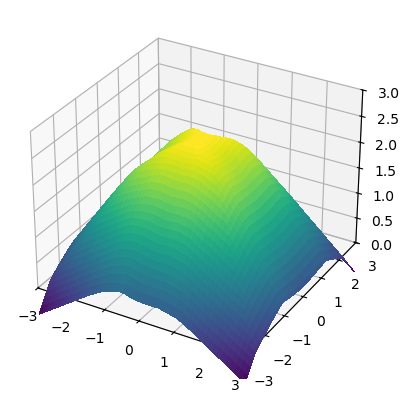

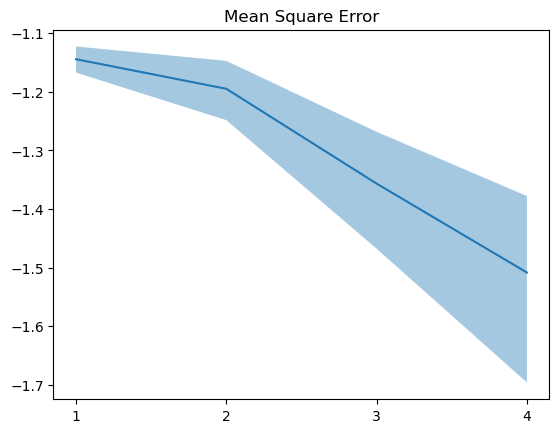

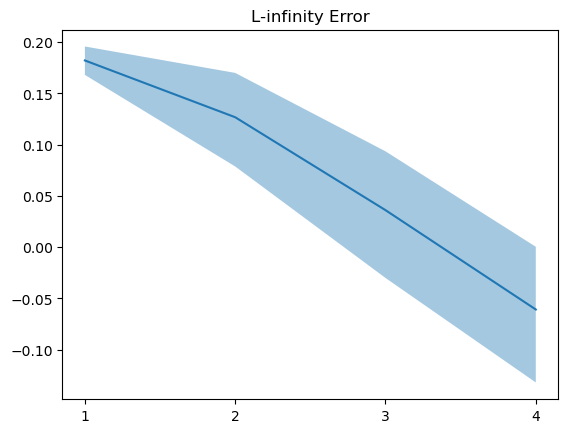

100%|██████████| 7000/7000 [02:06<00:00, 55.50it/s]


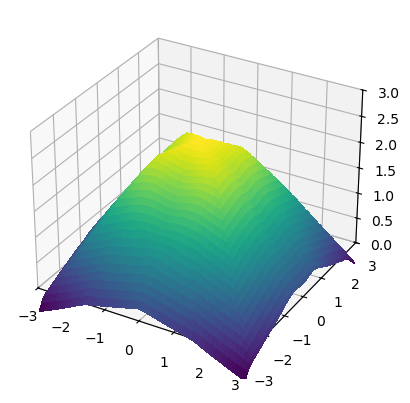

100%|██████████| 7000/7000 [02:00<00:00, 58.11it/s]


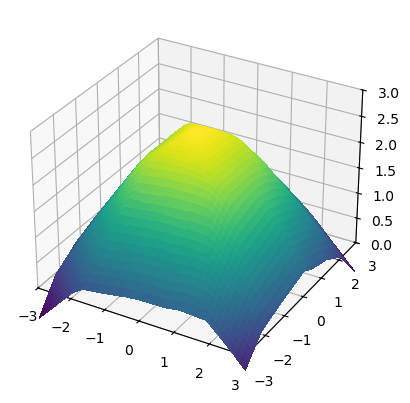

100%|██████████| 7000/7000 [01:57<00:00, 59.68it/s]


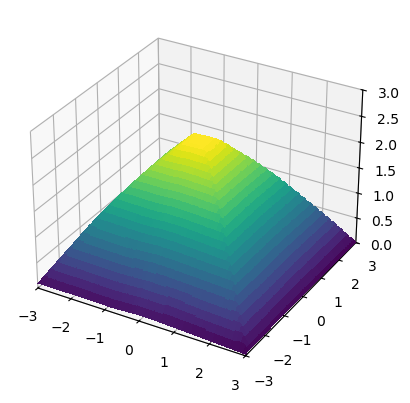

100%|██████████| 7000/7000 [01:56<00:00, 60.34it/s]


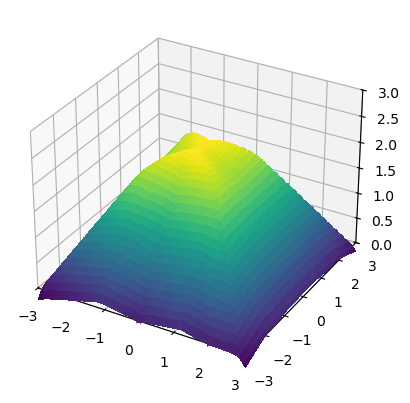

100%|██████████| 7000/7000 [01:55<00:00, 60.79it/s]


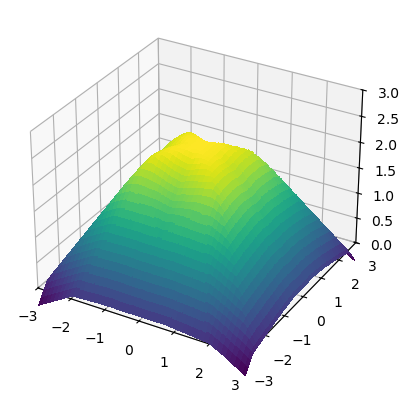

100%|██████████| 7000/7000 [01:55<00:00, 60.37it/s]


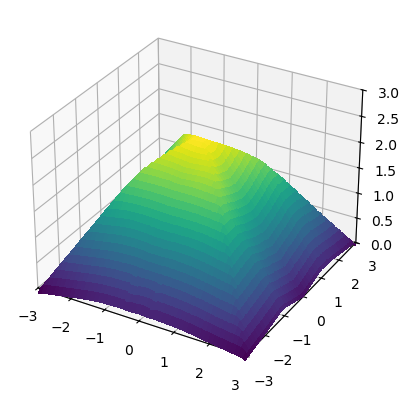

100%|██████████| 7000/7000 [01:57<00:00, 59.69it/s]


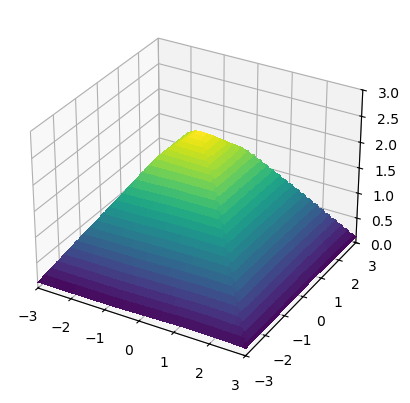

100%|██████████| 7000/7000 [01:58<00:00, 58.85it/s]


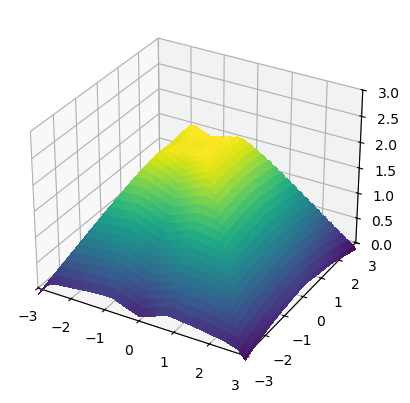

100%|██████████| 7000/7000 [02:01<00:00, 57.58it/s]


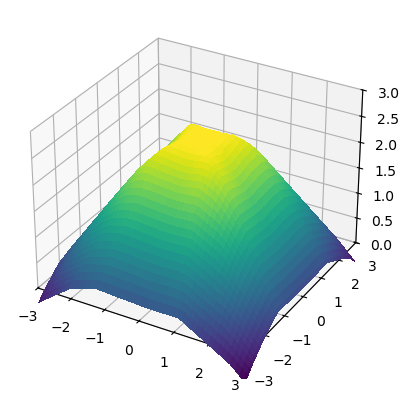

100%|██████████| 7000/7000 [02:06<00:00, 55.40it/s]


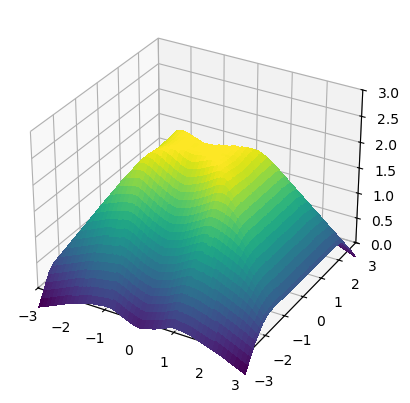

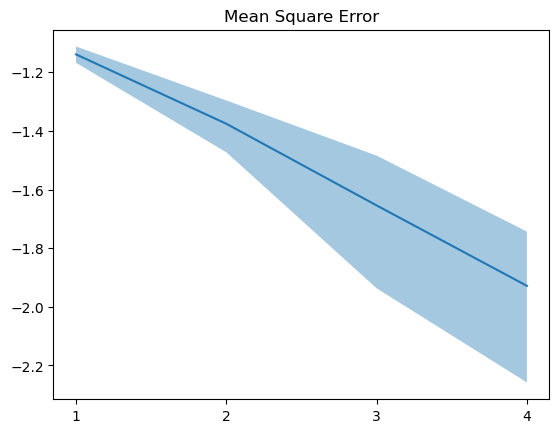

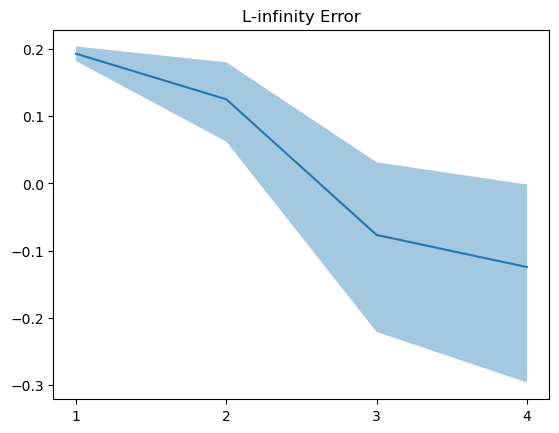

In [3]:
from Training.training import train
from error_test.cube_error import error_cube

MSE_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
L_inf_error_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
run_times = torch.zeros([n_experiments, n_experiments_rep])

for j in range(n_experiments):

    for k in range(n_experiments_rep):
        
        domain = data_gen_cube(side_length, dim_list[j])
        
        if len(arch_list[j]) == 2:        
            NN = FCFF_3L([dim_list[j]] + arch_list[j])
        else:
            NN = FCFF_4L([dim_list[j]] + arch_list[j])
        
        training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)
        
        time = 0.
        
        for i in range(rounds):
            
            training_params['alpha'] = alpha_list[j][i]
            training_params['delta'] = delta_list[j][i]
            
            training_params['n_coloc_points'] = N_col_list[j][i]
            training_params['n_boundary_points'] = N_b_list[j][i]
            training_params['num_iterations'] = num_iterations_list[j][i]
            
            t0 = t()
            total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
            time += t() - t0
            
            MC_points = int(1e6) # Number of grid points for comparison with the ground truth
            MSE, L_inf = error_cube(NN, side_length, MC_points)
            
            MSE_history[j,k,i] = MSE
            L_inf_error_history[j,k,i] = L_inf
        
        run_times[j,k] = time

        X_axis = 0
        Y_axis = 1
        plot_2d_proj(X_axis, Y_axis, NN, 100, side_length)
    
    plt.plot(np.arange(rounds), MSE_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (MSE_history[j].mean(0) - MSE_history[j].std(0)).log10(),
                     (MSE_history[j].mean(0) + MSE_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('Mean Square Error')
    plt.show()
    
    plt.plot(np.arange(rounds), L_inf_error_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (L_inf_error_history[j].mean(0) - L_inf_error_history[j].std(0)).log10(),
                     (L_inf_error_history[j].mean(0) + L_inf_error_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('L-infinity Error')
    plt.show()


MSE_average = MSE_history.mean(1)
MSE_std = MSE_history.std(1)

Linf_average = L_inf_error_history.mean(1)
Linf_std = L_inf_error_history.std(1)

run_time_avg = run_times.mean(1) 


In [4]:
run_time_avg = run_times.mean(1) 

import pandas as pd
import numpy as np

training_features = pd.DataFrame({'Dimension': dim_list,
                               'Architecture': arch_list,
                               'delta': delta_list,
                               'alpha': alpha_list,
                               'N': N_col_list,
                               'N_b': N_b_list,
                               'Iterations': num_iterations_list})

run_T = pd.DataFrame({'Runtime (s)': np.array(run_time_avg)}).astype('int')

results_MSE = pd.DataFrame(np.array(MSE_average))
results_Linf = pd.DataFrame(np.array(Linf_average))


display('Mean Square Error', training_features.join(results_MSE).join(run_T).transpose())
display('L-infinity Error', training_features.join(results_Linf).join(run_T).transpose())


#One table

MSE = np.array(MSE_history[:,:,-1])
L_inf_error = np.array(L_inf_error_history[:,:,-1])

data_MSE = pd.DataFrame(MSE.transpose())
means_MSE = data_MSE.mean()
stds_MSE = data_MSE.std()

data_Linf = pd.DataFrame(L_inf_error.transpose())
means_Linf = data_Linf.mean()
stds_Linf = data_Linf.std()

summary_df = pd.DataFrame({
    'MSE': means_MSE.round(3).astype(str) + ' ± ' + stds_MSE.round(3).astype(str),
    'L_inf': means_Linf.round(3).astype(str) + ' ± ' + stds_Linf.round(3).astype(str)
})

display(training_features.join(summary_df).join(run_T).transpose())

'Mean Square Error'

0                         1  \
Dimension                            5                         5   
Architecture                  [30, 30]              [30, 30, 30]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
0                             0.065665                  0.061625   
1                             0.022073                   0.01691   
2                             0.013098                  0.012302   
3                              0.01258                  0.010253   
Runtime (s)                         62                        85   

                                     2                         3  \
Dimension                            5                         8   
Architecture              [30, 30, 30]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2500, 3000, 5000]  [3000, 3000, 3000, 3000]   
0                             0.066765                  0.074514   
1                             0.016177                  0.080699   
2                             0.009825                  0.062451   
3                             0.005793                  0.046533   
Runtime (s)                        133                       154   

                                     4                         5  
Dimension                            8                         8  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [3000, 3000, 3000, 3000]  [3000, 4000, 5000, 7000]  
0                             0.071715                  0.072643  
1                             0.063843                  0.042125  
2                             0.043981                  0.022181  
3                              0.03101                  0.011792  
Runtime (s)                        209                       331

'L-infinity Error'

0                         1  \
Dimension                            5                         5   
Architecture                  [30, 30]              [30, 30, 30]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
0                              1.33945                  1.416701   
1                             0.736548                  0.773064   
2                             0.601833                  0.539714   
3                             0.606448                  0.527146   
Runtime (s)                         62                        85   

                                     2                         3  \
Dimension                            5                         8   
Architecture              [30, 30, 30]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2500, 3000, 5000]  [3000, 3000, 3000, 3000]   
0                             1.434126                  1.394412   
1                             0.749914                     1.536   
2                              0.56537                   1.45092   
3                             0.435479                  1.128786   
Runtime (s)                        133                       154   

                                     4                         5  
Dimension                            8                         8  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [3000, 3000, 3000, 3000]  [3000, 4000, 5000, 7000]  
0                             1.520784                  1.558623  
1                             1.338803                  1.333419  
2                             1.086747                   0.83812  
3                             0.869523                  0.750963  
Runtime (s)                        209                       331

0                         1  \
Dimension                            5                         5   
Architecture                  [30, 30]              [30, 30, 30]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
MSE                      0.013 ± 0.002              0.01 ± 0.007   
L_inf                    0.606 ± 0.079             0.527 ± 0.119   
Runtime (s)                         62                        85   

                                     2                         3  \
Dimension                            5                         8   
Architecture              [30, 30, 30]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [2000, 2500, 3000, 5000]  [3000, 3000, 3000, 3000]   
MSE                      0.006 ± 0.004             0.047 ± 0.006   
L_inf                    0.435 ± 0.137              1.129 ± 0.18   
Runtime (s)                        133                       154   

                                     4                         5  
Dimension                            8                         8  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [3000, 3000, 3000, 3000]  [3000, 4000, 5000, 7000]  
MSE                      0.031 ± 0.011             0.012 ± 0.006  
L_inf                     0.87 ± 0.131             0.751 ± 0.245  
Runtime (s)                        209                       331

In [5]:
print(training_features[['Dimension', 'Architecture', 'Iterations']].join(summary_df).join(run_T).to_latex())

\begin{tabular}{lrllllr}
\toprule
 & Dimension & Architecture & Iterations & MSE & L_inf & Runtime (s) \\
\midrule
0 & 5 & [30, 30] & [2000, 2000, 2000, 2000] & 0.013 ± 0.002 & 0.606 ± 0.079 & 62 \\
1 & 5 & [30, 30, 30] & [2000, 2000, 2000, 2000] & 0.01 ± 0.007 & 0.527 ± 0.119 & 85 \\
2 & 5 & [30, 30, 30] & [2000, 2500, 3000, 5000] & 0.006 ± 0.004 & 0.435 ± 0.137 & 133 \\
3 & 8 & [40, 40] & [3000, 3000, 3000, 3000] & 0.047 ± 0.006 & 1.129 ± 0.18 & 154 \\
4 & 8 & [40, 40, 40] & [3000, 3000, 3000, 3000] & 0.031 ± 0.011 & 0.87 ± 0.131 & 209 \\
5 & 8 & [40, 40, 40] & [3000, 4000, 5000, 7000] & 0.012 ± 0.006 & 0.751 ± 0.245 & 331 \\
\bottomrule
\end{tabular}



<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_14976\1596278041.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_14976\1596278041.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


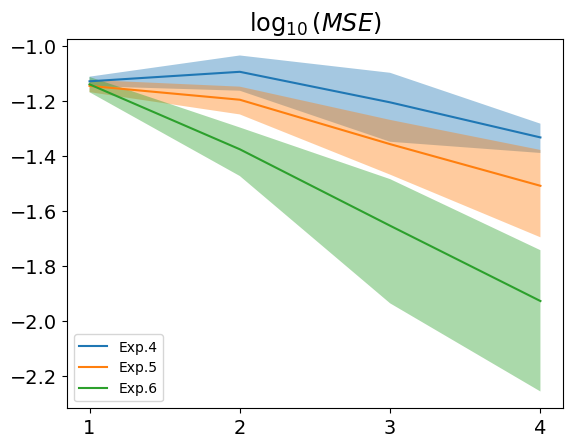

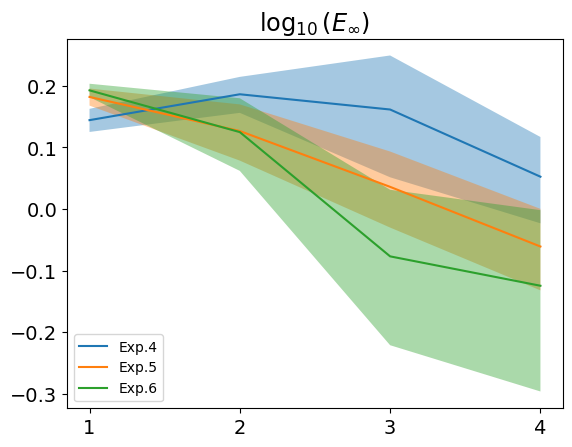

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(3,6):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(3,6):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()